In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


* Age - Age in months
* Number - Number of vertebrate involved
* Start - Top most vertebrate operated on

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [7]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


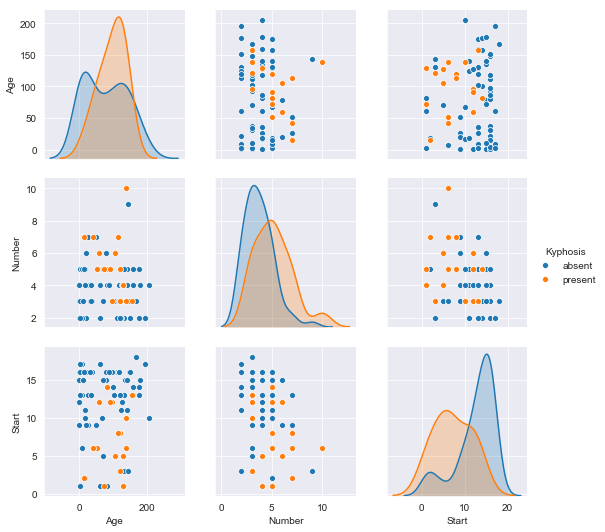

In [13]:
sns.set_style('darkgrid')
sns.pairplot(df,hue='Kyphosis')

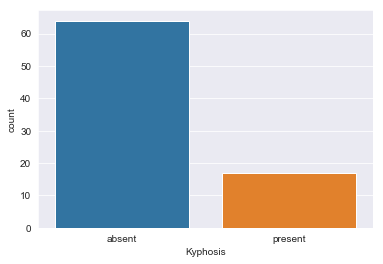

In [14]:
sns.countplot(df['Kyphosis'])

In [15]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
pred = dtree.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [29]:
print(confusion_matrix(pred,y_test))
print('\n')
print(classification_report(pred,y_test))
print('\n')
print(accuracy_score(pred,y_test))
print('\n')

[[16  1]
 [ 2  6]]


             precision    recall  f1-score   support

     absent       0.89      0.94      0.91        17
    present       0.86      0.75      0.80         8

avg / total       0.88      0.88      0.88        25



0.88




In [30]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
max=0

for i in range(50,100):
    for j in range(1,5):
        for k in range(1,3):
            
            rfc = RandomForestClassifier(n_estimators=i,max_depth=j,max_features=k)
            rfc.fit(X_train,y_train)
            pred = rfc.predict(X_test)
            accs = accuracy_score(y_test,pred)
            
            if accs > max:
                I = i
                J = j
                K = k
                max = accs
                #cm = confusion_matrix(y_test,pred)
                #cr = classification_report(y_test,pred)
            
print(str(I)+" "+str(J)+" "+str(K))
#print(cm)
print('\n')
#print(cr)
print('\n')
print(max)

57 4 2




0.88
